<a href="https://colab.research.google.com/github/Joel-Williams-Mathew/SupervisedModel/blob/main/Fake_or_Real_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Fake.csv to Fake.csv
Saving True.csv to True.csv



📊 Logistic Regression Accuracy: 0.9822
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      4270
           1       0.99      0.98      0.98      4710

    accuracy                           0.98      8980
   macro avg       0.98      0.98      0.98      8980
weighted avg       0.98      0.98      0.98      8980



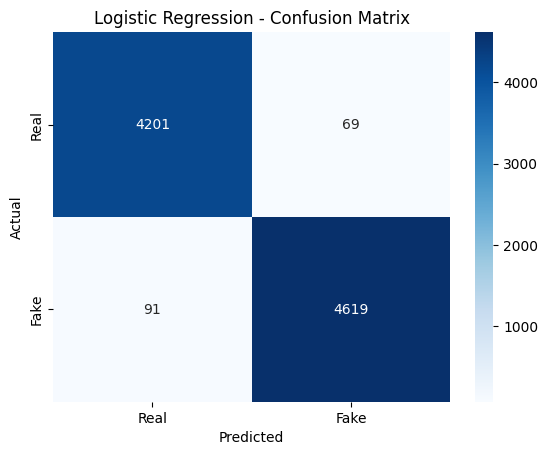


📊 Naive Bayes Accuracy: 0.9324
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      4270
           1       0.94      0.94      0.94      4710

    accuracy                           0.93      8980
   macro avg       0.93      0.93      0.93      8980
weighted avg       0.93      0.93      0.93      8980



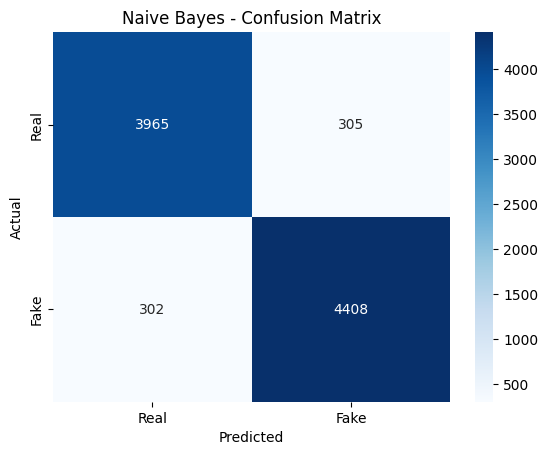

In [2]:
# fake_news_detector.py

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# ────────────── 1. LOAD AND PREPARE DATA ──────────────
fake_df = pd.read_csv("Fake.csv")
real_df = pd.read_csv("True.csv")

# Add labels
fake_df['label'] = 1   # 1 = FAKE
real_df['label'] = 0   # 0 = REAL

# Combine and shuffle
df = pd.concat([fake_df, real_df], ignore_index=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Use only the 'text' and 'label' columns
df = df[['text', 'label']]

# ────────────── 2. TEXT VECTORIZATION ──────────────
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X = vectorizer.fit_transform(df['text'])
y = df['label']

# ────────────── 3. TRAIN‑TEST SPLIT ──────────────
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ────────────── 4. TRAIN MODELS ──────────────
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# ────────────── 5. EVALUATION ──────────────
def evaluate_model(y_test, y_pred, title):
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f"\n📊 {title} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Real", "Fake"], yticklabels=["Real", "Fake"])
    plt.title(f"{title} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

evaluate_model(y_test, lr_pred, "Logistic Regression")